In [1]:
# import libraries
import pandas as pd
import json
import os
import shutil
import time
import matplotlib.pyplot as plt

In [2]:
# global variables
runs_path = r'C:\Program Files (x86)\Steam\steamapps\common\SlayTheSpire\runs'  # path to game generated runs folder
data_path = '../../data'                                                        # path to folder in repo where runs stored

chars = ['IRONCLAD', 'THE_SILENT', 'DEFECT', 'WATCHER']                         # list of character name strings as written in run files
dicts = []                                                                      # empty list of dicts that will hold all runs organized by character

In [3]:
# data holds a dict of a sample run to use for testing purposes

testf = open('sample.run')

test_data = json.load(testf)

test_data

{'gold_per_floor': [119,
  139,
  158,
  172,
  185,
  185,
  213,
  229,
  229,
  246,
  246,
  277,
  277,
  75,
  75,
  146,
  146,
  163,
  193,
  212,
  262,
  280,
  309,
  309,
  322,
  370,
  370,
  370,
  370,
  384,
  384,
  384,
  461,
  461,
  479,
  494,
  199,
  199,
  246,
  258,
  282,
  294,
  378,
  390,
  31,
  58,
  58,
  78,
  78,
  78],
 'floor_reached': 51,
 'playtime': 9059,
 'items_purged': ['Defend_P', 'Strike_P', 'Strike_P'],
 'score': 1205,
 'play_id': 'b173af22-458b-497e-8a20-f02a0b7ae345',
 'local_time': '20230315144117',
 'is_ascension_mode': True,
 'campfire_choices': [{'data': 'Eruption', 'floor': 6.0, 'key': 'SMITH'},
  {'floor': 15.0, 'key': 'REST'},
  {'floor': 24.0, 'key': 'REST'},
  {'floor': 27.0, 'key': 'REST'},
  {'data': 'Adaptation', 'floor': 29.0, 'key': 'SMITH'},
  {'floor': 32.0, 'key': 'REST'},
  {'floor': 42, 'key': 'REST'},
  {'floor': 44, 'key': 'REST'},
  {'floor': 49, 'key': 'REST'}],
 'neow_cost': 'TEN_PERCENT_HP_LOSS',
 'seed_source

In [4]:
# copy run files from game folders to repo data folder

for name in chars:
    for f in os.listdir(runs_path + "\\" + name):
        f_path = runs_path + "\\" + name + '\\' + f
        dest_dir = data_path + '\\' + name
        shutil.copy(f_path, dest_dir)

In [5]:
# fill out dicts array with total current runs for each character

# for each character, creates array and appends a dict containing info for each run file in character's run folder
for name in chars:
    runs = []
    for path in os.listdir(data_path + "\\" + name):
        f = open(data_path + "\\" + name + "\\" + path)
        runs.append(json.load(f))
        last = runs[-1]
        if ('PrismaticShard' in last["relics"]):
            print(last)
            runs.pop()
        f.close()
    dicts.append(runs)

{'gold_per_floor': [112, 125, 141, 141, 17, 17, 51, 51, 51, 62, 62, 137, 206, 263, 263, 364, 364, 399, 22, 85, 145, 145, 145, 59, 116, 116, 152, 180, 205, 216, 231, 231, 359, 359, 400, 400, 29, 42, 80, 80, 106, 184, 265, 265, 328, 328, 340, 350, 350, 350], 'floor_reached': 51, 'playtime': 5597, 'items_purged': ['Regret', 'Strike_R', 'Bite+1', 'Quick Slash'], 'score': 840, 'play_id': '20e86f9f-b17f-4bd4-adec-9245c59a7376', 'local_time': '20230819233346', 'is_ascension_mode': True, 'campfire_choices': [{'data': 'Bash', 'floor': 6.0, 'key': 'SMITH'}, {'data': 'SashWhip', 'floor': 15.0, 'key': 'SMITH'}, {'data': 'Feel No Pain', 'floor': 23.0, 'key': 'SMITH'}, {'floor': 32.0, 'key': 'REST'}, {'data': 'Armaments', 'floor': 40.0, 'key': 'SMITH'}, {'data': 'Dark Embrace', 'floor': 44.0, 'key': 'SMITH'}, {'data': 'Setup', 'floor': 46.0, 'key': 'SMITH'}, {'data': 'Reprogram', 'floor': 49.0, 'key': 'SMITH'}], 'neow_cost': 'NONE', 'seed_source_timestamp': 0, 'circlet_count': 0, 'master_deck': ['De

In [6]:
# getWinRates() gets and returns the win rates for each character
def getWinRates():
    char_wrs = []
    for x, c in enumerate(dicts):
        char_wrs.append([0, 0])
        for r in c:
            char_wrs[x][1] += 1
            if (r["victory"]):
                char_wrs[x][0] += 1
        char_wrs[x].append(round(char_wrs[x][0] / char_wrs[x][1], 2))

    return char_wrs

In [7]:
# getScores() gets and returns high + avg scores for each char.
def getScores():
    scrs = []
    for x, c in enumerate(dicts):
        scrs.append([0])
        scores = 0
        cnt = 0
        for r in c:
            scores += r["score"]
            cnt += 1
            if (r["score"] > scrs[x][0]):
                scrs[x][0] = r["score"]
        scrs[x].append(int(scores / cnt))
    return scrs

In [8]:
# getAvgFlrs() calculates and returns avg floor for each char., including and not including wins (reaching lvl 51)
def getAvgFlrs():
    avgFlrs = []
    for x, c in enumerate(dicts):
        flrs = 0
        cnt = 0
        flrs_nw = 0
        cnt_nw = 0
        for r in c:
            flrs += r["floor_reached"]
            cnt += 1
            if (not r["victory"]):
                flrs_nw += r["floor_reached"]
                cnt_nw += 1
        avgFlrs.append([int(flrs/cnt), int(flrs_nw/cnt_nw)])
    return avgFlrs

In [9]:
char_info_cols = ['Wins', 'Games', 'Win_Rate', 'High_Score', 'Avg_Score', 'Avg_Flr', 'Avg_Flr_No_Wins']
info_dict = {chars[0]: [], chars[1]: [], chars[2]: [], chars[3]: []}

wrs = getWinRates()
scrs = getScores()
avgFlrs = getAvgFlrs()
for i, c in enumerate(chars):
    info_dict[c] = info_dict[c] + wrs[i] + scrs[i] + avgFlrs[i]

char_df = pd.DataFrame.from_dict(info_dict, orient='index', columns=char_info_cols)

char_df

,Wins,Games,Win_Rate,High_Score,Avg_Score,Avg_Flr,Avg_Flr_No_Wins
IRONCLAD,14,35,0.40,2031,822,37,28
THE_SILENT,17,54,0.31,1840,724,33,25
DEFECT,15,46,0.33,2140,782,35,27
WATCHER,20,38,0.53,2179,1025,42,32


In [10]:
""" char_df_html = char_df.drop(['High_Score', 'Avg_Score', 'Avg_Flr', 'Avg_Flr_No_Wins'], axis=1).rename(columns={"Win_Rate":"Win Rate"}, index={"THE_SILENT":"SILENT"})
f = open("../../scripts/overall_df.txt", "w")
f.write(char_df_html.to_html(table_id="info-table", border=0))
f.close() """

' char_df_html = char_df.drop([\'High_Score\', \'Avg_Score\', \'Avg_Flr\', \'Avg_Flr_No_Wins\'], axis=1).rename(columns={"Win_Rate":"Win Rate"}, index={"THE_SILENT":"SILENT"})\nf = open("../../scripts/overall_df.txt", "w")\nf.write(char_df_html.to_html(table_id="info-table", border=0))\nf.close() '

In [11]:
wr_info = []

for x in range(0,4):
    wr_arr = []
    wr_arr.append(char_df['Win_Rate'][x])
    wr_arr.append(char_df['Wins'][x])
    wr_arr.append(char_df['Games'][x])
    wr_info.append(wr_arr)

C:\Users\happy\AppData\Local\Temp\ipykernel_14232\3422709739.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  wr_arr.append(char_df['Win_Rate'][x])
C:\Users\happy\AppData\Local\Temp\ipykernel_14232\3422709739.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  wr_arr.append(char_df['Wins'][x])
C:\Users\happy\AppData\Local\Temp\ipykernel_14232\3422709739.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  wr_arr.append(char_df['Ga

In [12]:
heart_lvls = [0]*4
heart_runs = []

for x, c in enumerate(dicts):
    x_heart_runs = []
    max_lvl = 0
    for r in c:
        if r["floor_reached"] > 55:
            x_heart_runs.append(r)
            if r["is_ascension_mode"]:
                if r["ascension_level"] > max_lvl:
                    max_lvl = r["ascension_level"]
    heart_lvls[x] = max_lvl
    heart_runs.append(x_heart_runs)

In [13]:
wr_info_str = str(wr_info) + ":" + str(heart_lvls)
wr_info_str

'[[0.4, 14, 35], [0.31, 17, 54], [0.33, 15, 46], [0.53, 20, 38]]:[1, 2, 2, 3]'

In [14]:
filepath = "../../scripts/overall_wr_info.txt"
if os.path.exists(filepath):
    f.close()
    os.remove(filepath)
f = open(filepath, "w")
f.write(wr_info_str)
f.close()

In [15]:
# gets and stores dict of neow bonuses keying to dicts of costs and wins/games (neows) 
# and dict (bonus_info) of neow bonuses keying to overall wins/games

neows = {}
bonus_info = {}
for c in dicts:
    for r in c:
        bonus = r['neow_bonus']
        cost = r['neow_cost']
        neows.setdefault(bonus, {})
        bonus_info.setdefault(bonus, [0, 0])
        neows[bonus].setdefault(cost, [0, 0])
        neows[bonus][cost][1] += 1
        bonus_info[bonus][1] += 1
        if(r['victory']):
            neows[bonus][cost][0] += 1
            bonus_info[bonus][0] += 1

In [16]:
# puts neow's bonuses' wins/times chosen/win rates into (nw_df) and displays it

print("Neow's Bonus Win Rates")

# put into dataframe
neow_columns = ["Wins", "Times_Chosen"]
nw_df = pd.DataFrame.from_dict(bonus_info, orient='index', columns=neow_columns)
nw_df.columns.name = "Neow's_Bonus"
nw_df['Win_Rate'] = round(nw_df['Wins'] / nw_df['Times_Chosen'], 2)
nw_df = nw_df.sort_values(by=['Win_Rate', 'Times_Chosen'], ascending=False)
nw_df

Neow's Bonus Win Rates


Neow's_Bonus,Wins,Times_Chosen,Win_Rate
HUNDRED_GOLD,5,7,0.71
ONE_RANDOM_RARE_CARD,2,3,0.67
TEN_PERCENT_HP_BONUS,3,5,0.60
BOSS_RELIC,4,7,0.57
THREE_ENEMY_KILL,13,28,0.46
REMOVE_TWO,11,24,0.46
THREE_RARE_CARDS,6,13,0.46
RANDOM_COLORLESS_2,5,11,0.45
REMOVE_CARD,3,7,0.43
ONE_RARE_RELIC,6,20,0.30


In [17]:
nw_df_html = nw_df.rename(columns={"Times_Chosen":"Times Chosen", "Win_Rate":"Win Rate"})
f = open("../../scripts/neow_body.txt", "w")
f.write(nw_df_html.to_html(table_id="nw-body", border=0, header=False))
f.close()

In [18]:
# function that takes reference to a neow bonus dictionary (has costs + wins/times_chosen) and returns a df of cost info for that bonus

def create_bonus_df(bonus):

    df = pd.DataFrame.from_dict(bonus, orient='index', columns=neow_columns)
    df['Win_Rate'] = round(df['Wins'] / df['Times_Chosen'], 2)
    df.insert(0, "Neow's Cost", df.index.values)
    df = df.sort_values(by=['Times_Chosen'], ascending=False)
    df = df.sort_values(by=['Win_Rate'], ascending=False)
    df = df.reset_index(drop=True)
    df = df.rename(columns={"Times_Chosen":"Times Chosen", "Win_Rate":"Win Rate"})
    return df

In [19]:
neows_html = {}
f = open("../../scripts/neow-bycost-tables.txt", "w")

for bonus in neows:
    if ("NONE" in neows[bonus]):
        continue

    cost_df = create_bonus_df(neows[bonus])
    cost_df = cost_df.set_index(["Neow's Cost"])
    cost_df.index.name = None
    tableID = bonus.replace("_", "-").lower() + "-T"
    neows_html[tableID] = cost_df.to_html(table_id=tableID, border=0)

f.write(json.dumps(neows_html))
    
f.close()

In [20]:
# funcation that takes df for a neow bonus and name of bonus and prints a table with cost info for that bonus

def plot_bonus_table(bonus_name):
    df = create_bonus_df(neows[bonus_name])
    fig = plt.figure(figsize = (8, .2))
    tbl = fig.add_subplot(111)

    tbl.table(cellText = df.values, rowLabels = df.index,
            colLabels = df.columns, cellLoc='center')
    tbl.set_title(bonus_name)
    tbl.axis('off')

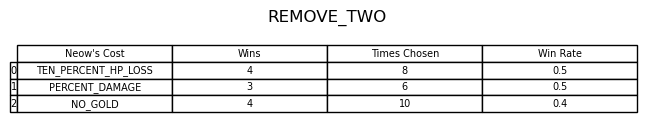

In [21]:
# for seeing win rate table of certain bonus + it's costs
bonus_name = 'REMOVE_TWO'
plot_bonus_table(bonus_name)

In [22]:
# caculate and store wins + games for each relic in (relics) dict
acts = [17, 34, 51]
relics = {}                                 # relics = {act1 = {r1 = [x,y], ...}, ...}

for c in dicts:
    for r in c:
        win = r['victory']
        for relic in r['relics']:
            relics.setdefault(relic, [0,0])
            relics[relic][1] += 1
            if (win):
                relics[relic][0] += 1

In [23]:
# creates dataframe with # wins, # games, and winrates of all relics in (r_df) and prints it
print("ALL RELIC WIN RATES")

relic_columns = ['Wins', 'Games']
r_df = pd.DataFrame.from_dict(relics, orient='index', columns=relic_columns)
r_df.columns.name = 'Relic'
r_df['Win_Rate'] = round(r_df['Wins'] / r_df['Games'], 2)
r_df = r_df.sort_values(by=['Win_Rate', 'Games'], ascending=False)

for r in r_df.index:
    print(r)

ALL RELIC WIN RATES
Damaru
Runic Cube
Nuclear Battery
Sling
Enchiridion
Paper Crane
Self Forming Clay
CloakClasp
Mark of Pain
Cauldron
Emotion Chip
CultistMask
Runic Dome
Melange
Lizard Tail
Toxic Egg 2
Runic Pyramid
Nilry's Codex
Ice Cream
Busted Crown
FossilizedHelix
Singing Bowl
Ninja Scroll
Molten Egg 2
Bronze Scales
Potion Belt
Pen Nib
SlaversCollar
Regal Pillow
Blue Candle
InkBottle
Akabeko
Bag of Marbles
Happy Flower
Whetstone
Red Mask
Bottled Flame
Calipers
WingedGreaves
Shovel
Snake Skull
Frozen Eye
VioletLotus
Spirit Poop
Lee's Waffle
TeardropLocket
GoldenEye
Anchor
Pantograph
Bag of Preparation
Dream Catcher
Calling Bell
Medical Kit
Kunai
Centennial Puzzle
Peace Pipe
Ginger
Pocketwatch
Torii
Dead Branch
Snecko Eye
Letter Opener
Nunchaku
Frozen Egg 2
Paper Frog
ClockworkSouvenir
Thread and Needle
Yang
Vajra
Art of War
Mummified Hand
StrikeDummy
Shuriken
HornCleat
Smiling Mask
SacredBark
Lantern
PreservedInsect
Fusion Hammer
Astrolabe
Strange Spoon
Coffee Dripper
Mercury Hourg

In [24]:
bossR = ["Astrolabe", "Black Blood", "Black Star", "Busted Crown", "Calling Bell", "Coffee Dripper", "Cursed Key", "Ectoplasm", "Empty Cage", "Frozen Core", "Fusion Hammer", "Holy Water", "Hovering Kite", "Inserter", "Mark of Pain", "Nuclear Battery", "Pandora's Box", "Philosopher's Stone", "Ring of the Serpent", "Runic Cube", "Runic Dome", "Runic Pyramid", "Sacred Bark", "Slaver's Collar", "Snecko Eye", "Sozu", "Tiny House", "Velvet Choker", "Violet Lotus", "Wrist Blade"]

In [25]:
boss_r_df = pd.DataFrame(columns=relic_columns)
for r in r_df.index:
    if r in bossR:
        boss_r_df = pd.concat([boss_r_df, r_df.loc[r_df.index == r]])

boss_r_df

,Wins,Games,Win_Rate
Runic Cube,4,4,1.00
Nuclear Battery,4,4,1.00
Mark of Pain,1,1,1.00
Runic Dome,1,1,1.00
Runic Pyramid,16,19,0.84
Busted Crown,8,10,0.80
Calling Bell,7,11,0.64
Snecko Eye,5,8,0.62
Fusion Hammer,8,14,0.57
Astrolabe,8,14,0.57


In [26]:
# creates (sm_r_df) with 3 most gotten relics of each win rate value and prints it
sm_r_df = pd.DataFrame()
wRates = r_df['Win_Rate'].unique()

for wr in wRates:
    sm_r_df = pd.concat([sm_r_df, r_df.loc[r_df['Win_Rate'] == wr].head(3)])

sm_r_df

Relic,Wins,Games,Win_Rate
Damaru,5,5,1.00
Runic Cube,4,4,1.00
Nuclear Battery,4,4,1.00
Lizard Tail,11,12,0.92
Toxic Egg 2,6,7,0.86
...,...,...,...
Odd Mushroom,2,8,0.25
Velvet Choker,1,4,0.25
Tough Bandages,0,3,0.00
Nloth's Gift,0,3,0.00


In [27]:
# converts given month name to number version for dates
def name_to_num(month):
    match month:
        case "Jan":
            return "01"
        case "Feb":
            return "02"
        case "Mar":
            return "03"
        case "Apr":
            return "04"
        case "May":
            return "05"
        case "Jun":
            return "06"
        case "Jul":
            return "07"
        case "Aug":
            return "08"
        case "Sep":
            return "09"
        case "Oct":
            return "10"
        case "Nov":
            return "11"
        case "Dec":
            return "12"

In [28]:
runs_abrv = {"Date": [], "Character": [], "Ascension_Level": [], "Floor_Reached": [], "Heart": [], "Win": []}

for x,c in enumerate(dicts):
    for r in c:
        timestamp = time.ctime(r["timestamp"]).split()
        if (len(timestamp[2]) == 1):
            timestamp[2] = "0" + timestamp[2]
        runs_abrv["Date"].append(name_to_num(timestamp[1]) + "/" + timestamp[2] + "/" + timestamp[4][2:])

        runs_abrv["Character"].append(chars[x].replace("THE_", ""))

        if (r["is_ascension_mode"]):
            runs_abrv["Ascension_Level"].append("Asc " + str(r["ascension_level"]))
        else:
            runs_abrv["Ascension_Level"].append("No Asc")

        flr_rched = r["floor_reached"]
        runs_abrv["Floor_Reached"].append(flr_rched)
        heart = "No"
        if (flr_rched > 53):
            heart = "Yes"
        runs_abrv["Heart"].append(heart)
        
        if (r["victory"]):
            runs_abrv["Win"].append("Y")
        else:
            runs_abrv["Win"].append("N")

In [29]:
runs_df = pd.DataFrame.from_dict(runs_abrv)

dateSort = []
for d in runs_df['Date']:
    dateList = d.split('/')
    dateList[0], dateList[1] = dateList[1], dateList[0]
    dateSort.append(''.join(dateList[::-1]))

runs_df['Sort'] = dateSort

runs_df.index.name = None
runs_df = runs_df.sort_values('Sort', ascending=False)
runs_df = runs_df.drop(axis=1, columns=['Sort'])
runs_df = runs_df.set_index('Date')
runs_df.index.name = None
runs_df

,Character,Ascension_Level,Floor_Reached,Heart,Win
05/16/24,DEFECT,Asc 2,55,Yes,N
05/14/24,WATCHER,Asc 3,55,Yes,N
05/09/24,DEFECT,Asc 2,51,No,Y
05/08/24,DEFECT,Asc 2,55,Yes,N
05/05/24,SILENT,Asc 2,56,Yes,Y
...,...,...,...,...,...
02/14/23,WATCHER,Asc 6,51,No,Y
02/13/23,WATCHER,Asc 6,33,No,N
02/13/23,WATCHER,Asc 6,40,No,N
02/12/23,SILENT,Asc 7,51,No,Y


In [30]:
runs_df_html = runs_df.rename(columns={"Character":"Character", "Ascension_Level":"Asc", "Floor_Reached":"Floor", "Win":"More"})
runs_header = pd.DataFrame([list(runs_df_html.columns)]).to_html(table_id="runs-head", border=0, header=None)
f = open("../../scripts/all_runs.txt", "w")
f.write(runs_header + "," + runs_df_html.to_html(table_id="runs", border=0, header=None))
f.close()